In [26]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

note: train set has 60,000 samples and the test set 10,000
extracting MNIST/train-images-idx3-ubyte.gz...


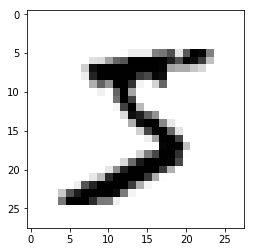

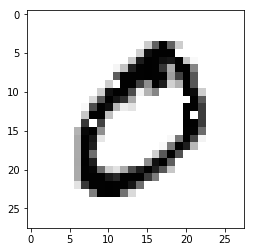

In [53]:
from extract_mnist import *

def add_noise(im, noise_level=0.05):
    ret = np.zeros(im.shape)
    ret = ret + im
    idx = np.where(np.random.binomial(1, 1-noise_level, size=im.shape) != 1)
    ret[idx] = 0 # flip pixels
    return(ret)

mnist = extract_data("MNIST/train-images-idx3-ubyte.gz")
mnist = mnist[:4000]
mnist = mnist.astype(np.int)

# plot
plt.imshow(mnist[0], cmap="gray_r")
plt.show()

labels = mnist.copy()
train = add_noise(mnist)

plt.imshow(train[1], cmap="gray_r")
plt.show()


In [99]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(DenoisingAutoencoder, self).__init__()
        self.in_dim = input_size
        self.hid_dim = hidden_size
        
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, input_size)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, input):
        hid = self.sigmoid(self.i2h(input))
        out = self.sigmoid(self.h2o(hid))
        return(out)

in_size = 28 * 28
hidden_size = 512
model = DenoisingAutoencoder(in_size, hidden_size)
criterion = nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=5e-3, momentum=0.9)

note: train set has 60,000 samples and the test set 10,000
extracting MNIST/train-images-idx3-ubyte.gz...


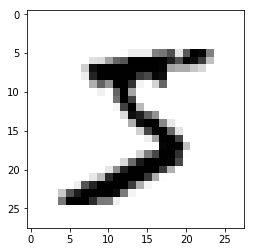

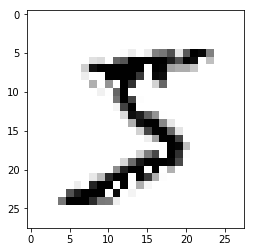

torch.Size([20, 784]) torch.Size([20, 784])
Epoch 1 has a loss of 1595.3533111572265
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 2 has a loss of 1473.9982916259767
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 3 has a loss of 1411.4324572753906
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 4 has a loss of 1374.850640258789
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 5 has a loss of 1354.68048828125
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 6 has a loss of 1341.129871826172
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 7 has a loss of 1335.7320404052734
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 8 has a loss of 1332.0327575683593
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 9 has a loss of 1332.3112048339844
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 10 has a loss of 1332.4660345458985
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 11 has a loss of 1329.2016693115233
torch.Size([20, 784]) torch.Size([20, 784])
Epoch 12 has a loss of 

In [109]:
epochs = 20
batch_size=20

# mnist = labels, data = inputs
mnist = extract_data("MNIST/train-images-idx3-ubyte.gz")
mnist = mnist[:4000]
mnist = mnist.astype(np.float) / 256
labels = mnist.copy()
data = add_noise(mnist, .15)

plt.imshow(labels[0], cmap="gray_r")
plt.show()
plt.imshow(data[0], cmap="gray_r")
plt.show()

target_tensor = torch.from_numpy(mnist.reshape(mnist.shape[0], -1)).float()
data = data.reshape(data.shape[0], -1)
data_tensor = torch.from_numpy(data).float()
dataset = TensorDataset(data_tensor, target_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, 
                        shuffle=False)

for epoch in range(epochs):
    running_loss = 0.
    for mb, l in dataloader:
        mb, l = Variable(mb), Variable(l)
        
        # Init gradient
        model.zero_grad()
        # forward step
        out = model(mb)
        # calculate loss and back propagate
        loss = criterion(out, l)
        loss.backward()
        if running_loss == 0.:
            print(out.data.size(), l.data.size())
        running_loss += loss.data[0]
        optimizer.step()
    print("Epoch {} has a loss of {}".format(epoch+1, running_loss / (data_tensor.size(0) / batch_size)))
    

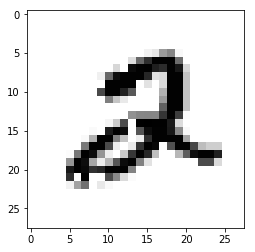

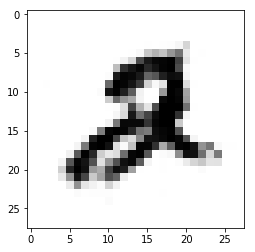

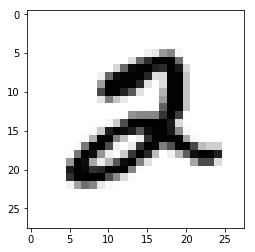

In [110]:
test = add_noise(mnist, .1)

j = 5

plt.imshow(test[j], cmap="gray_r")
plt.show()

test = test.reshape(test.shape[0], -1)
input = Variable(torch.from_numpy(test)).float()
out = model(input)
out = out.data.numpy()
out = out.reshape(out.shape[0], 28, 28)
plt.imshow(out[j], cmap="gray_r")
plt.show()
mnist = mnist.reshape(mnist.shape[0], -1)
mnist = mnist.reshape(mnist.shape[0], 28, 28)

plt.imshow(labels[j], cmap="gray_r")
plt.show()

In [98]:
out[0]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,